In [ ]:
from IPython.display import HTML

<div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <center>

<div dir="rtl" style="text-align: center;">

  <img src="https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3bjQ3Z3dzOXR4ZnAwazYwa3hzOWdqY3hjcWI0b21mc3ZiNzcyNHExOSZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/stp5fcC5iUM1ra4btP/giphy.gif" width="230" style="margin: 10px;">
</div>

</center>

##  **مشروع Un-Mute**

### ✨ *مقدمة المشروع* ✨  
في عالمٍ مليء بالأصوات، هناك من يعيش في صمتٍ لا يُرى ولا يُسمع.  
مشروع **Un-Mute** يهدف إلى كسر الصورة النمطية عن الأشخاص ذوي الإعاقة السمعية، وتسليط الضوء على قدراتهم، مواهبهم، وحقوقهم في مجتمعٍ أكثر شمولًا وتقبّلًا.

### 🎯 *أهداف المشروع*  
- تغيير النظرة المجتمعية تجاه ذوي الإعاقة السمعية  
- إبراز مواهبهم وقدراتهم في مختلف المجالات  
- تعزيز الوعي بحقوقهم ودمجهم في الحياة اليومية  
- تقديم محتوى بصري وتفاعلي يعكس لغتهم وثقافتهم


In [ ]:
!git clone https://github.com/Mimouni-Abdessamed/ARSLW.git

fatal: destination path 'ARSLW' already exists and is not an empty directory.



<div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">

  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExeXR5azF0OWJ0M2IxdmN6cHo4b3k5NmJ1aWlveWszNWpvc3BqZnVocyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/VDMGbuVZ29Yay0H4TC/giphy.gif" width="30" style="margin-left: 90px;">
    <span>تثبيت المكتبات</span>
  </h1>
</div>



In [ ]:
# تثبيت المكتبات اللازمة لمعالجة النصوص العربية والصور
!pip install arabic_reshaper python-bidi
!pip install tabulate


<div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">

  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExeXR5azF0OWJ0M2IxdmN6cHo4b3k5NmJ1aWlveWszNWpvc3BqZnVocyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/VDMGbuVZ29Yay0H4TC/giphy.gif" width="30" style="margin-left: 90px;">
    <span>استيراد المكتبات</span>
  </h1>
</div>



In [ ]:
# استيراد المكتبات المستخدمة في المعالجة (الصور، الملفات، الشبكات العصبية...)
import os
import shutil
import random
from PIL import Image, ImageEnhance, ImageFilter
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
from tensorflow.keras.callbacks import EarlyStopping


<div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif; ">

  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExeWRzOGw0MGljY3h1Y210M3NmN3FsNGwxNTJ1c25lZ3dwNGtyd3NueiZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/KazrNvjZnUSN3oam6V/giphy.gif" width="60" style="margin-left: 10px;">
    <span>معالجة البيانات وتحسين جودة الصور</span>
  </h1>

</div>



In [ ]:

# تحديد المسارات (المجلد الأساسي للبيانات والمجلد الجديد للمعالجة)
base_dir = '/content/ARSLW/Dataset'
target_dir = '/content/new_dataset'
min_count = 450
max_count = 550

# رفع الكلمات للمستوى الأعلى
for category in os.listdir(base_dir):
    cat_path = os.path.join(base_dir, category)
    if not os.path.isdir(cat_path): continue
    for word in os.listdir(cat_path):
        word_path = os.path.join(cat_path, word)
        if os.path.isdir(word_path):
            shutil.move(word_path, os.path.join(base_dir, word))
    if not os.listdir(cat_path):
        os.rmdir(cat_path)

# حذف الصور المكررة
def remove_duplicates(paths):
    unique, hashes = [], set()
    for path in paths:
        try:
            img = Image.open(path).resize((64, 64)).convert('RGB')
            h = tuple(img.getdata())
            if h not in hashes:
                hashes.add(h)
                unique.append(path)
        except: continue
    return unique

# Augmentation
def augment_image_simple(path, out_dir, count):
    img = Image.open(path).convert('RGB')
    for i in range(count):
        aug = img.copy()
        if random.random() < 0.5: aug = aug.transpose(Image.FLIP_LEFT_RIGHT)
        aug = aug.rotate(random.uniform(-15, 15))
        aug = ImageEnhance.Brightness(aug).enhance(random.uniform(0.8, 1.2))
        if random.random() < 0.3: aug = aug.filter(ImageFilter.GaussianBlur(radius=random.uniform(0, 1.5)))
        if random.random() < 0.3:
            px = aug.load()
            for _ in range(100):
                x, y = random.randint(0, aug.width - 1), random.randint(0, aug.height - 1)
                px[x, y] = (255, 255, 255)
        aug.save(os.path.join(out_dir, f"aug_{i}_{os.path.basename(path)}"))

# معالجة الكلمات
os.makedirs(target_dir, exist_ok=True)

for word in os.listdir(base_dir):
    word_path = os.path.join(base_dir, word)
    if not os.path.isdir(word_path): continue
    images = [os.path.join(word_path, f) for f in os.listdir(word_path) if f.lower().endswith(('.jpg', '.png'))]
    images = remove_duplicates(images)

    out_path = os.path.join(target_dir, word)
    os.makedirs(out_path, exist_ok=True)

    if len(images) > max_count:
        for img in random.sample(images, max_count):
            shutil.copy(img, out_path)
    else:
        for img in images:
            shutil.copy(img, out_path)
        for _ in range(max(min_count - len(images), 0)):
            augment_image_simple(random.choice(images), out_path, 1)



<div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3Ynlkd3NneGg2Z2ljb2kxend5NTdpcnZmcjhvbWg2eDJpYnEyM3AzcSZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/JsJiP3ozomFAqbSeE0/giphy.gif" width="99" style="margin-left: 50px;">
    <span>توحيد اللغة وتنظيف المجلدات</span>
  </h1>
</div>

In [ ]:
# المسار الأساسي
base_dir = '/content/new_dataset'

# 🗣️ ترجمة الكلمات الإنجليزية إلى عربية
translation_map = {
    'father': 'أب',
    'mother': 'أم',
    'grandfather': 'الجد',
    'grandmother': 'الجدة',
    'grand': 'جد',
}

# 1️⃣ حذف مجلد Health بالكامل
health_path = os.path.join(base_dir, 'Health')
if os.path.exists(health_path):
    shutil.rmtree(health_path)
    print(f"🗑️ تم حذف مجلد Health بالكامل")

# 2️⃣ إعادة تسمية المجلدات الإنجليزية
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        new_name = translation_map.get(folder.lower())
        if new_name and new_name != folder:
            new_path = os.path.join(base_dir, new_name)

            # إذا المجلد الجديد موجود مسبقًا، نحذفه أول
            if os.path.exists(new_path):
                shutil.rmtree(new_path)
                print(f"⚠️ تم حذف المجلد الموجود مسبقًا: {new_name}")

            # الآن ننقل بدون تعارض
            shutil.move(folder_path, new_path)
            print(f"🌐 إعادة تسمية: {folder} → {new_name}")


⚠️ تم حذف المجلد الموجود مسبقًا: أم
🌐 إعادة تسمية: mother → أم
⚠️ تم حذف المجلد الموجود مسبقًا: أب
🌐 إعادة تسمية: father → أب
⚠️ تم حذف المجلد الموجود مسبقًا: الجدة
🌐 إعادة تسمية: grandmother → الجدة
⚠️ تم حذف المجلد الموجود مسبقًا: الجد
🌐 إعادة تسمية: grandfather → الجد
⚠️ تم حذف المجلد الموجود مسبقًا: جد
🌐 إعادة تسمية: grand → جد



<div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3M2M2c3RpeHJwZWZuamtzZW1yMzhhZTdkNHZ4czFtanF5bWRkNHczdyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/eJdqFBWazjaZaouaNI/giphy.gif" width="90" style="margin-left: 10px;">
    <span>تحليل استكشافي لمحتوى البيانات</span>
  </h1>
</div>


In [ ]:

# المسار الأساسي
base_dir = '/content/new_dataset'

# جمع الإحصائيات
stats = {}
for folder in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        image_count = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))])
        stats[folder] = image_count

# عرض النتائج بشكل أفقي
print("\n📊 تحليل لمحتوى البيانات:\n")
for name, count in stats.items():
    print(f"{name} 🠖 {count} صورة", end=" | ")

# عرض الإجمالي
total = sum(stats.values())
print(f"\n\n الإجمالي: {total} صورة")



📊 تحليل لمحتوى البيانات:

أب 🠖 550 صورة | أم 🠖 550 صورة | ابيض 🠖 858 صورة | احرص 🠖 448 صورة | احمر 🠖 974 صورة | اخضر 🠖 699 صورة | ازرق 🠖 924 صورة | اسود 🠖 723 صورة | اصمت 🠖 1017 صورة | اكسجين 🠖 688 صورة | الجد 🠖 550 صورة | الجدة 🠖 550 صورة | الم 🠖 733 صورة | بنفسجي1 🠖 451 صورة | بنفسجي2 🠖 718 صورة | بني 🠖 402 صورة | جد 🠖 550 صورة | جواب 🠖 420 صورة | حمى 🠖 701 صورة | دم 🠖 842 صورة | دواء 🠖 844 صورة | عربية 🠖 469 صورة | كحة 🠖 726 صورة | كلية1 🠖 506 صورة | كلية2 🠖 1042 صورة | لغة 🠖 482 صورة | ممتاز 🠖 713 صورة | نظافة 🠖 458 صورة | وردي 🠖 731 صورة | يتيمم1 🠖 481 صورة | يتيمم2 🠖 830 صورة | يسافر 🠖 583 صورة | يشرب 🠖 413 صورة | يشم 🠖 805 صورة | يفكر 🠖 424 صورة | ينظر 🠖 861 صورة | 

 الإجمالي: 23716 صورة



<div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3M2M2c3RpeHJwZWZuamtzZW1yMzhhZTdkNHZ4czFtanF5bWRkNHczdyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/duFIxVBygPvfAxiMwJ/giphy.gif" width="90" style="margin-left: 10px;">
    <span>  تحليل استكشافي لمحتوى البيانات بشكل بياني </span>
  </h1>
</div>

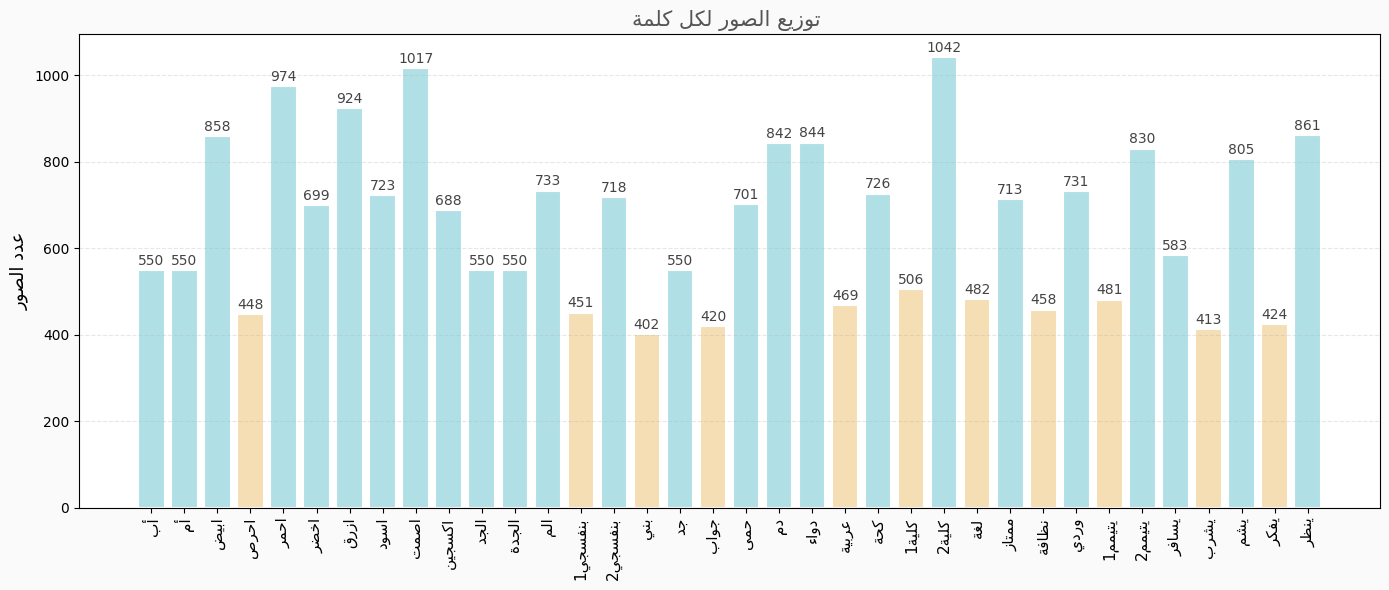

In [ ]:
import os
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# مسار البيانات
base_dir = '/content/new_dataset'

# جمع الإحصائيات
labels = []
counts = []

for folder in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        image_count = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))])
        reshaped = arabic_reshaper.reshape(folder)
        bidi_text = get_display(reshaped)
        labels.append(bidi_text)
        counts.append(image_count)

#  ألوان باستيل مستوحاة من الصورة
colors = []
for count in counts:
    if count < 400:
        colors.append('#FFB6C1')  # وردي ناعم
    elif count < 550:
        colors.append('#F5DEB3')  # بيج فاتح
    else:
        colors.append('#B0E0E6')  # أزرق ثلجي

# رسم الرسم البياني
plt.figure(figsize=(14, 6), facecolor='#FAFAFA')
bars = plt.bar(labels, counts, color=colors, edgecolor='white', linewidth=1.5)

plt.xticks(rotation=90, fontsize=11)
plt.ylabel(get_display(arabic_reshaper.reshape('عدد الصور')), fontsize=13)
plt.title(get_display(arabic_reshaper.reshape(' توزيع الصور لكل كلمة')), fontsize=15, color='#555')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# إضافة الأرقام فوق الأعمدة
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom', fontsize=10, color='#444')

plt.tight_layout()
plt.show()


<div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3eWtjanBwbjU3eHE3ZDNoaWpvNjIyMWhpcDFvMXc4OWg3cm1jcDdqMSZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/StW2hzvbyWZQzM0hGx/giphy.gif" width="70" style="margin-left: 10px;">
    <span>  التوازن الذكي للبيانات وتحسين التوزيع </span>
  </h1>
</div>

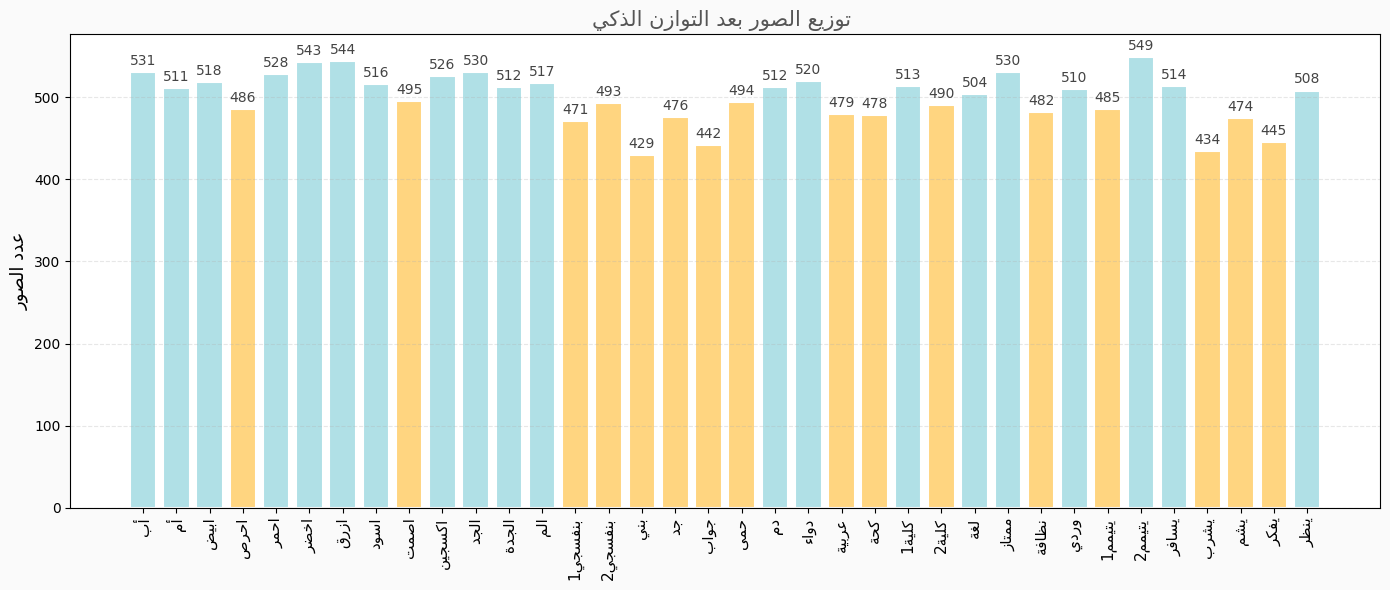

In [ ]:

# المسار الأساسي
base_dir = '/content/new_dataset'
target_range = (470, 550)

# Augmentation يدوي
def augment_image_simple(image_path, output_dir, count):
    img = Image.open(image_path).convert('RGB')
    for i in range(count):
        aug = img.copy()

        # قلب أفقي
        if random.random() < 0.5:
            aug = aug.transpose(Image.FLIP_LEFT_RIGHT)

        # تدوير خفيف
        angle = random.uniform(-10, 10)
        aug = aug.rotate(angle)

        # إضاءة معتدلة
        brightness = ImageEnhance.Brightness(aug)
        aug = brightness.enhance(random.uniform(0.95, 1.05))

        # ضبابية خفيفة
        if random.random() < 0.2:
            aug = aug.filter(ImageFilter.GaussianBlur(radius=random.uniform(0, 1)))

        # نقاط بيضاء خفيفة
        if random.random() < 0.2:
            pixels = aug.load()
            for _ in range(50):
                x = random.randint(0, aug.width - 1)
                y = random.randint(0, aug.height - 1)
                pixels[x, y] = (255, 255, 255)

        # حفظ الصورة
        aug.save(os.path.join(output_dir, f"aug_{i}_{os.path.basename(image_path)}"))

# تنفيذ التوازن الذكي
for folder in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))]
    image_paths = [os.path.join(folder_path, f) for f in images]
    current_count = len(image_paths)
    target_count = random.randint(*target_range)

    if current_count < target_count:
        needed = target_count - current_count
        for i in range(needed):
            src = random.choice(image_paths)
            augment_image_simple(src, folder_path, 1)

    elif current_count > target_count:
        to_delete = random.sample(image_paths, current_count - target_count)
        for path in to_delete:
            os.remove(path)

# جمع الإحصائيات بعد التوازن
labels = []
counts = []

for folder in sorted(os.listdir(base_dir)):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        count = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))])
        reshaped = arabic_reshaper.reshape(folder)
        bidi_text = get_display(reshaped)
        labels.append(bidi_text)
        counts.append(count)

#  رسم بياني
plt.figure(figsize=(14, 6), facecolor='#FAFAFA')

colors = []
for c in counts:
    if c < 500:
        colors.append('#FFD580')  # مشمشي ناعم
    else:
        colors.append('#B0E0E6')  # أزرق ثلجي

bars = plt.bar(labels, counts, color=colors, edgecolor='white', linewidth=1.5)

plt.xticks(rotation=90, fontsize=11)
plt.ylabel(get_display(arabic_reshaper.reshape('عدد الصور')), fontsize=13)
plt.title(get_display(arabic_reshaper.reshape(' توزيع الصور بعد التوازن الذكي')), fontsize=15, color='#555')
plt.grid(axis='y', linestyle='--', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom', fontsize=10, color='#444')

plt.tight_layout()
plt.show()


<div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3eWtjanBwbjU3eHE3ZDNoaWpvNjIyMWhpcDFvMXc4OWg3cm1jcDdqMSZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/YkZ9V88hpdKG1JTg3Q/giphy.gif" width="90" style="margin-left: 10px;">
    <span>  نظرة على عينات من الكلمات </span>
  </h1>
</div>

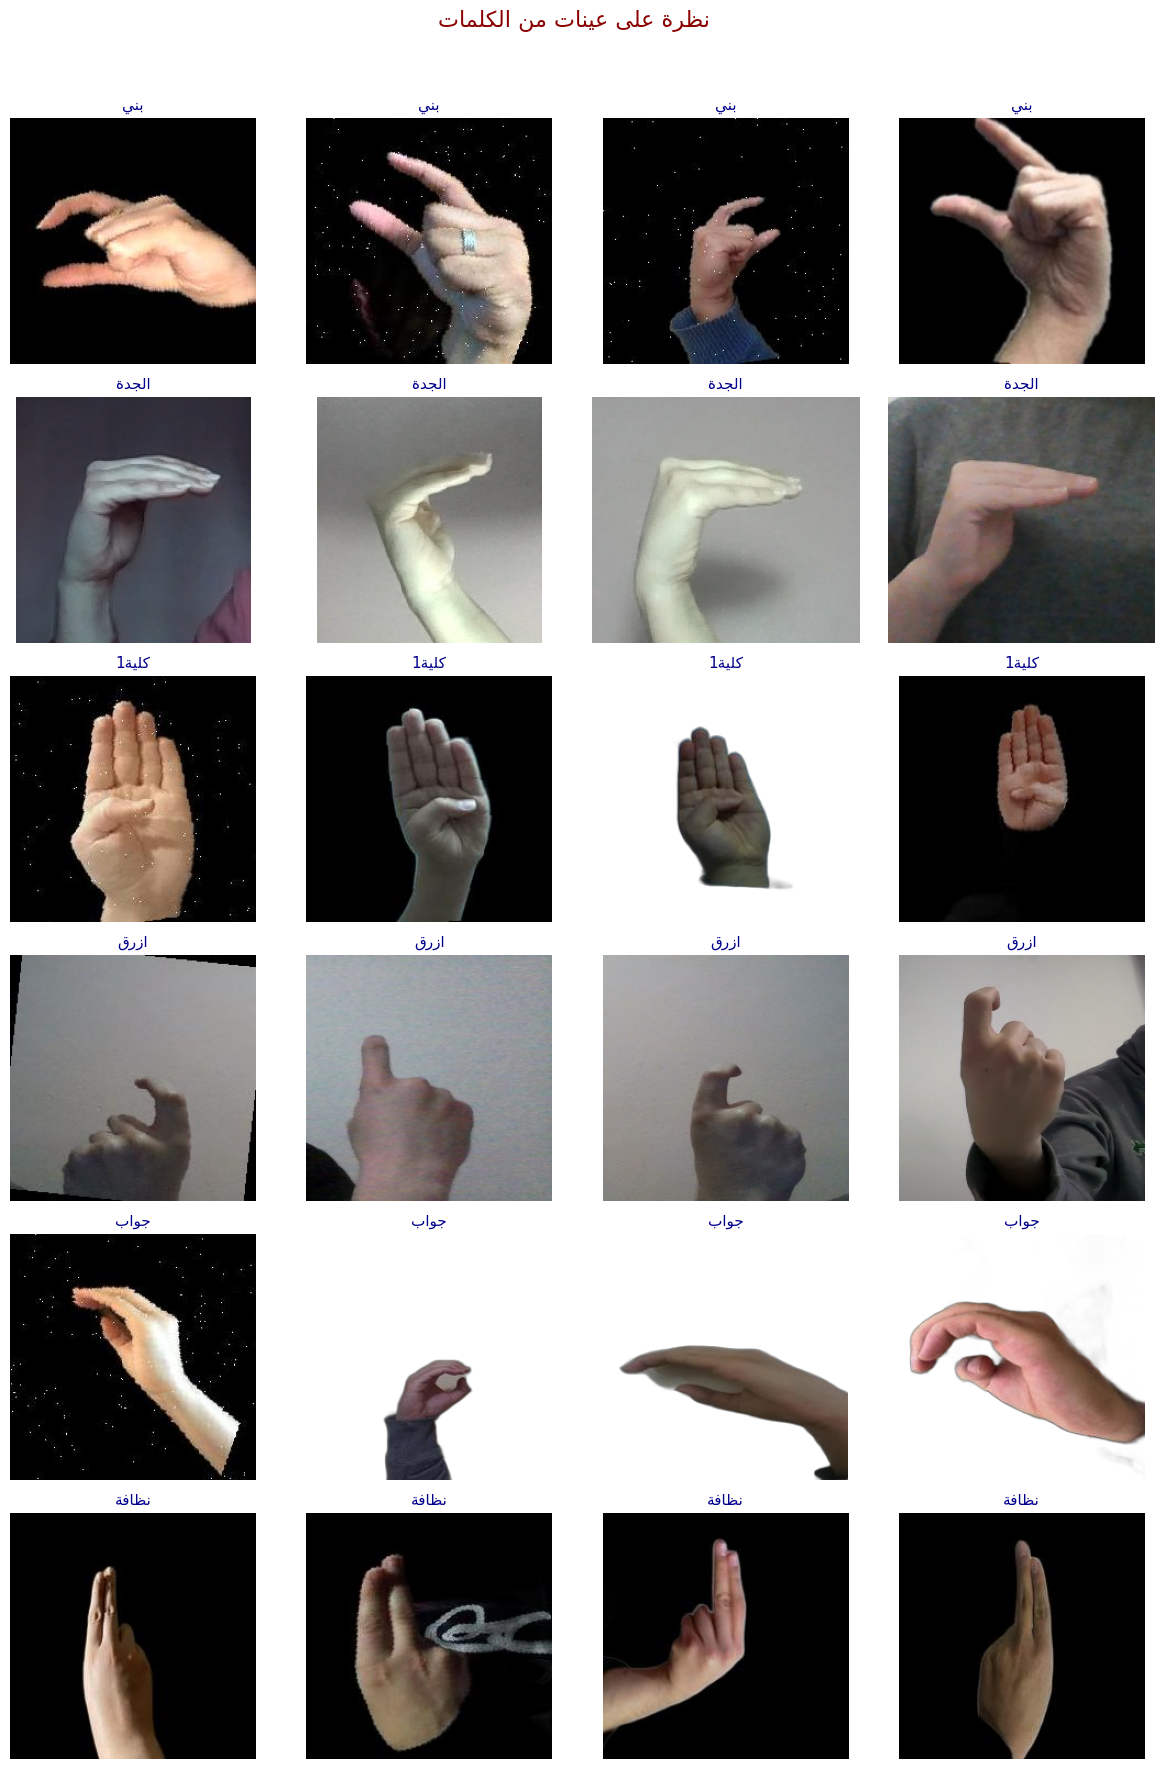

In [ ]:

# المسار الأساسي
base_dir = '/content/new_dataset'

# عدد الكلمات وعدد الصور لكل كلمة
num_classes = 6
num_images_per_class = 4

# اختيار كلمات عشوائية
folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]
selected_folders = random.sample(folders, min(num_classes, len(folders)))

# إعداد الرسم
fig, axs = plt.subplots(len(selected_folders), num_images_per_class, figsize=(num_images_per_class * 3, len(selected_folders) * 3))

for i, folder in enumerate(selected_folders):
    folder_path = os.path.join(base_dir, folder)
    images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))]
    selected_images = random.sample(images, min(num_images_per_class, len(images)))

    for j in range(num_images_per_class):
        img_path = os.path.join(folder_path, selected_images[j])
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis('off')

        # عنوان تحت كل صورة
        reshaped = arabic_reshaper.reshape(folder)
        bidi_text = get_display(reshaped)
        axs[i, j].set_title(bidi_text, fontsize=11, color='darkblue')

# تحسين التنسيق
plt.tight_layout()
plt.suptitle(get_display(arabic_reshaper.reshape(' نظرة على عينات من الكلمات')), fontsize=16, color='darkred')
plt.subplots_adjust(top=0.92)
plt.show()


<div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3cGllMnFhMXVveXhzbHVqNmg5cm92eWxiZ2NxanB4aGlkMmJ6aGJxaCZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/U2REzyBrR6JPDtkYyQ/giphy.gif" width="80" style="margin-left: 10px;">
    <span>   تحميل البيانات وتجهيزها للتدريب </span>
  </h1>
</div>

In [ ]:
# 1. تحميل الصور وتقسيمها إلى تدريب و تحقق
data_dir = '/content/new_dataset'
batch_size = 32
img_size = (224, 224)

raw_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

raw_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# 2. تحسين الأداء باستخدام cache و prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = raw_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = raw_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 3. حفظ أسماء الفئات
class_names = raw_train_ds.class_names


Found 17989 files belonging to 36 classes.
Using 14392 files for training.
Found 17989 files belonging to 36 classes.
Using 3597 files for validation.


  <div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcnJzcDRrOThyYjN1aGxuN3Yxcml1amJnaHlhMXM3Z3FpZmJ3MHQ0NiZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/kBk7dz4sQiKreqs14R/giphy.gif" width="70" style="margin-left: 10px;">
    <span>      بناء النموذج العصبي باستخدام ( CNNs-MobileNetV2 )  </span>
  </h1>
</div>

In [ ]:

# تحميل MobileNetV2 كقاعدة
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # نجمّد الطبقات
# 2.تحديد عدد الفئات
num_classes = 36
# 3. بناء النموذج الكامل
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')  # ← هذه هي الطبقة الأخيرة
])

###  تحديد المُحسّن ودالة الخسارة ومقياس الأداء
model.compile(
    optimizer='adam',                         # خوارزمية التحسين
    loss='sparse_categorical_crossentropy',   # دالة الخسارة للتصنيف متعدد الفئات
    metrics=['accuracy']                      # مقياس الدقة
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



  <div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3cGllMnFhMXVveXhzbHVqNmg5cm92eWxiZ2NxanB4aGlkMmJ6aGJxaCZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/NCDldcWwTIu5QlnhTE/giphy.gif" width="99" style="margin-left: 10px;">
    <span>   بدء تدريب النموذج مع مراقبة للأداء  </span>
  </h1>
</div>

In [ ]:

early_stop = EarlyStopping(
    monitor='val_loss',     # نراقب خسارة التحقق
    patience=2,             # ننتظر 3 تكرارات بدون تحسن
    restore_best_weights=True  # نرجّع أفضل أوزان
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop]
)

Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 738s 2s/step - accuracy: 0.3535 - loss: 2.1703 - val_accuracy: 0.7209 - val_loss: 0.7712
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 729s 2s/step - accuracy: 0.6920 - loss: 0.8146 - val_accuracy: 0.7456 - val_loss: 0.5547
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 716s 2s/step - accuracy: 0.7611 - loss: 0.5925 - val_accuracy: 0.7793 - val_loss: 0.4646
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 713s 2s/step - accuracy: 0.7843 - loss: 0.5149 - val_accuracy: 0.7940 - val_loss: 0.4222
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 712s 2s/step - accuracy: 0.7978 - loss: 0.4444 - val_accuracy: 0.7923 - val_loss: 0.4070
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 711s 2s/step - accuracy: 0.8064 - loss: 0.4139 - val_accuracy: 0.7965 - val_loss: 0.4021
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 706s 2s/step - accuracy: 0.8169 - loss: 0.3841 - val_accuracy: 0.7984 - val_loss: 0.3850
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 709s 2s/step - accuracy: 0.8125 - loss: 0.3773 - val_accu


  <div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcnJzcDRrOThyYjN1aGxuN3Yxcml1amJnaHlhMXM3Z3FpZmJ3MHQ0NiZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/Q5KYoopzomTgsvvn1r/giphy.gif" width="99" style="margin-left: 10px;">
    <span>   تطوّر دقة النموذج أثناء التدريب والتحقق بيانيًا  </span>
  </h1>
</div>

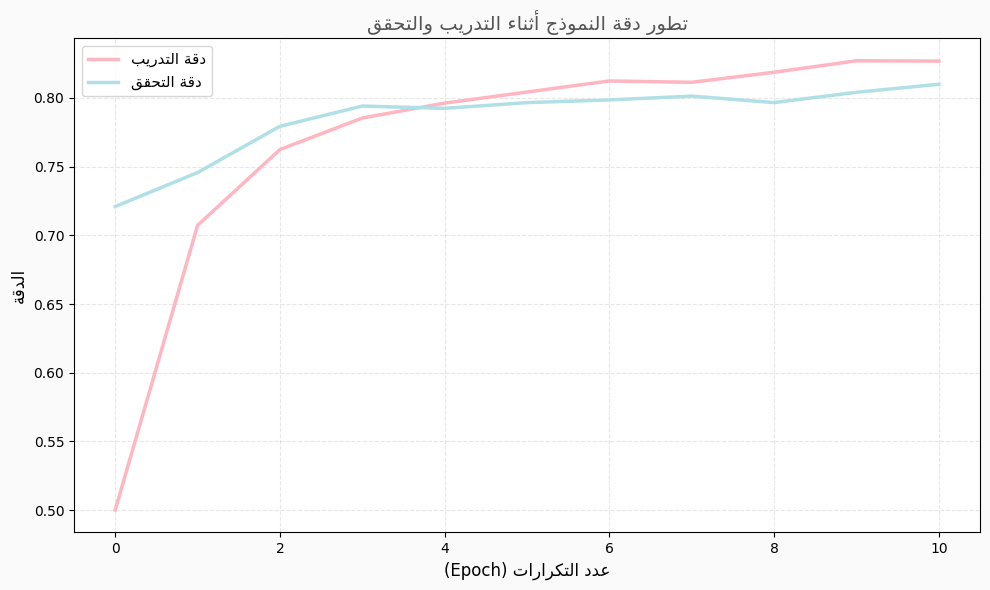

In [ ]:

def reshape(text):
    return get_display(arabic_reshaper.reshape(text))

# 7. رسم دقة النموذج أثناء التدريب والتحقق
plt.figure(figsize=(10, 6), facecolor='#FAFAFA')

plt.plot(history.history['accuracy'], label=reshape('دقة التدريب'), color='#FFB6C1', linewidth=2.5)
plt.plot(history.history['val_accuracy'], label=reshape('دقة التحقق'), color='#B0E0E6', linewidth=2.5)

plt.xlabel(reshape('عدد التكرارات (Epoch)'), fontsize=12)
plt.ylabel(reshape('الدقة'), fontsize=12)
plt.title(reshape('تطوّر دقة النموذج أثناء التدريب والتحقق'), fontsize=14, color='#555')

plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()



  <div dir="rtl" style="text-align: right; font-family: 'Cairo', sans-serif;">
  <h1 style="display: flex; align-items: center; justify-content: flex-start;">
    <img src="https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3ZW9zOXcwNzFlbWNrMHBvdjU2bGhseWljcWx1cXlkYWl0djR0dms3OCZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/kG8lkP6tRv2gDy2SIH/giphy.gif" width="110" style="margin-left: 50px;">
    <span>   اختبار النموذج على عينات تحقق عشوائية  </span>
  </h1>
</div>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


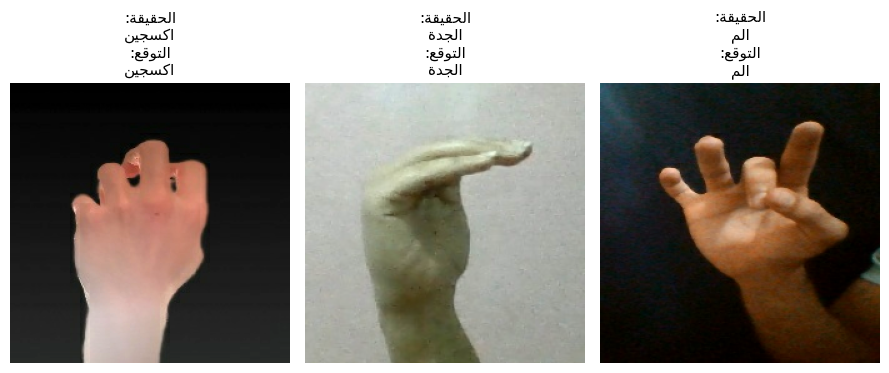

In [ ]:
import numpy as np

def reshape_arabic(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)

# عدد الصور اللي تنعرض
num_samples = 3

# أخذ دفعة عشوائية من val_ds
for images, labels in val_ds.shuffle(1000).take(1):
    indices = tf.random.shuffle(tf.range(tf.shape(images)[0]))[:num_samples]
    selected_images = tf.gather(images, indices)
    selected_labels = tf.gather(labels, indices)
    preds = model.predict(selected_images)

    plt.figure(figsize=(num_samples * 3, 4))
    for i in range(num_samples):
        img = selected_images[i].numpy()

        # تطبيع ديناميكي للتباين
        img = (img - img.min()) / (img.max() - img.min() + 1e-5)
        img = np.clip(img, 0.0, 1.0)

        # معالجة كل سطر عربي على حدة
        true_label = reshape_arabic(class_names[int(selected_labels[i].numpy())])
        pred_label = reshape_arabic(class_names[int(np.argmax(preds[i]))])
        line1 = reshape_arabic("الحقيقة:")
        line2 = true_label
        line3 = reshape_arabic("التوقع:")
        line4 = pred_label

        full_title = f"{line1}\n{line2}\n{line3}\n{line4}"

        plt.subplot(1, num_samples, i + 1)
        if img.ndim == 2 or img.shape[-1] == 1:
            plt.imshow(img.squeeze(), cmap='gray')
        else:
            plt.imshow(img)
        plt.axis('off')
        plt.title(full_title, fontsize=11)

    plt.tight_layout()
    plt.show()


In [ ]:
# 9 حفظ النموذج بصيغة .h5
model.save('/content/arabic_sign_model-1.h5')
print("✅ تم حفظ النموذج بنجاح")


✅ تم حفظ النموذج بنجاح


In [ ]:
import json

# حفظ أسماء الفئات من بياناتك
class_names = raw_train_ds.class_names

# إنشاء ملف JSON
with open('class_names.json', 'w') as f:
    json.dump(class_names, f)

print("✅ تم إنشاء class_names.json")


<div dir="rtl" style="text-align: center; font-family: 'Cairo', sans-serif; padding: 20px; width: 95%; margin: auto;">

<div style="display: flex; justify-content: center; ">
<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExdzU1azQ5dGhlbWp3M3U1MXIxbml1OXhnY2xwcWx0M21hcTRrbWt4cyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/jU397nUOKJjqNLneYG/giphy.gif" width="250">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZDN0YWM4Z3F2MnE0ZDdlb2I0OW1oOTl2OWt2MWU0Z2FnZHNxaGNzaSZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/leAqvqXDM5ST6yurMX/giphy.gif" width="400">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExdzU1azQ5dGhlbWp3M3U1MXIxbml1OXhnY2xwcWx0M21hcTRrbWt4cyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/jU397nUOKJjqNLneYG/giphy.gif" width="250">
</div>

  <h1>الخاتمة </h1>
<h2
  <p>
    بعد سلسلة من المشاهد التقنية، والتنقل بين مراحل التحميل، المعالجة، التدريب، والاختبار <br> نطوي الدفتر بلطف، ونترك خلفنا نموذجًا ذكيًا قادرًا على التعرّف، التوقّع، والتفاعل بدقة عالية.<br>
    هذا المشروع لم يكن مجرد تجربة برمجية، بل كان رحلة سردية متكاملة،  <br>حيث امتزجت الخوارزميات بالخيال، وتحوّلت البيانات إلى قصة مرئية تنبض بالحياة.<br>
    كل مهمة، من تنظيف الصور إلى رسم منحنيات الدقة، كانت مشهدًا مستقلًا في فيلم من إخراجك، <br>وكل سطر كود كان خطوة نحو بناء عقل رقمي يفهم ويحلل.<br>
    وفي هذه الخاتمة، لا نغلق المشروع، بل نفتح الباب لمشاريع قادمة، أكثر تعقيدًا، أكثر جمالًا، وأكثر ارتباطًا بالواقع والخيال.
  </p>
  </h2>


</div>
